In [40]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

debugging_mode = 0

In [41]:
%load_ext autoreload
#using autoreload 1 to reload all modules imported by %aimport everytime before executing the python code typed .
%autoreload 1

%aimport lane

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Sobel Threshold')

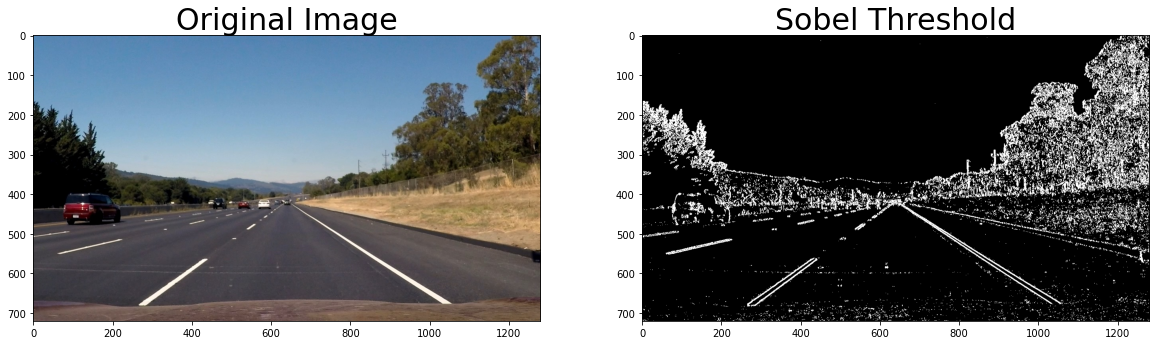

In [42]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
dst = lane.abs_sobel_thresh(gray, 'x', thresh=(10, 200))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img, cmap="gray")
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Sobel Threshold', fontsize=30)

Text(0.5, 1.0, 'Gradient')

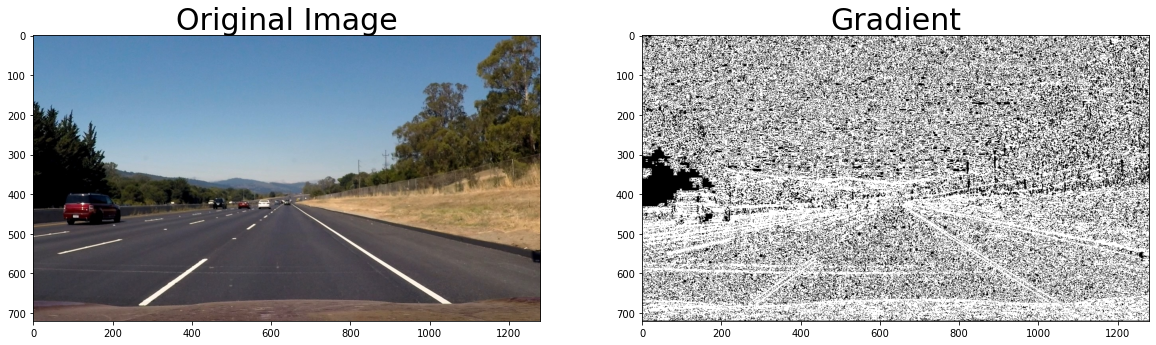

In [43]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
dst = lane.dir_threshold(gray, thresh=(np.pi/6, np.pi/2))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img, cmap="gray")
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Gradient', fontsize=30)

Text(0.5, 1.0, 'Masked')

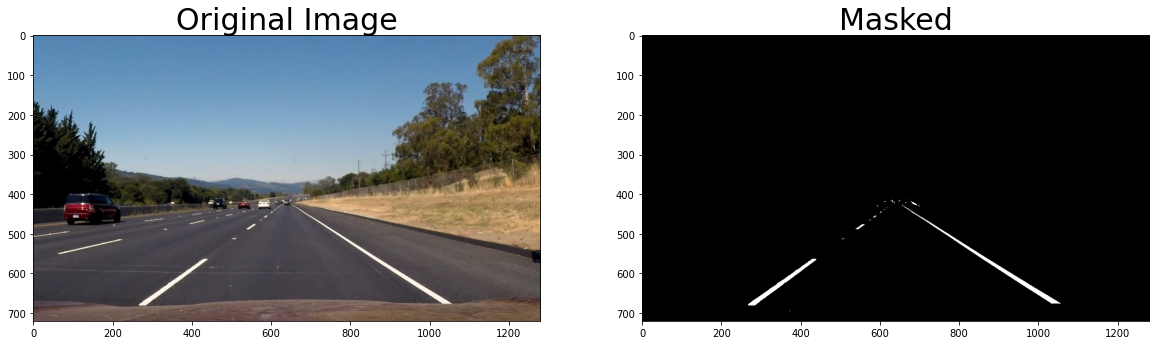

In [44]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = lane.combine_thresh(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img, cmap="gray")
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Masked', fontsize=30)

Text(0.5, 1.0, 'Warp')

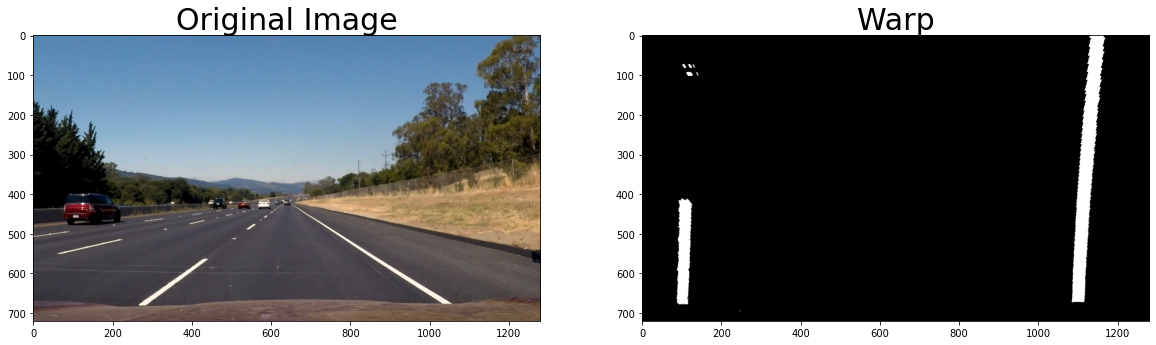

In [45]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = lane.combine_thresh(img)
dst = lane.perspective_warp(dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img, cmap="gray")
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Warp', fontsize=30)

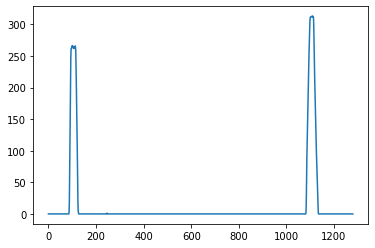

In [46]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = lane.combine_thresh(img)
dst = lane.perspective_warp(dst)
                            
histo = lane.get_hist(dst)
x_hist = np.array(range(0, 1280))
plt.plot(x_hist, histo)

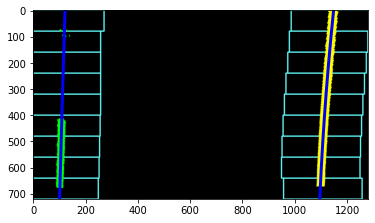

In [47]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = lane.combine_thresh(img)
dst = lane.perspective_warp(dst)
out_img, curves, lanes, ploty = lane.sliding_window(dst)
plt.imshow(dst)
plt.plot(curves[0], ploty, color='blue', linewidth=3)
plt.plot(curves[1], ploty, color='blue', linewidth=3)

curverad= lane.get_curve(img, curves[0],curves[1])

img_ = lane.draw_lanes(img, curves[0], curves[1])
plt.imshow(out_img, cmap='hsv')

Text(0.5, 1.0, 'Final output')

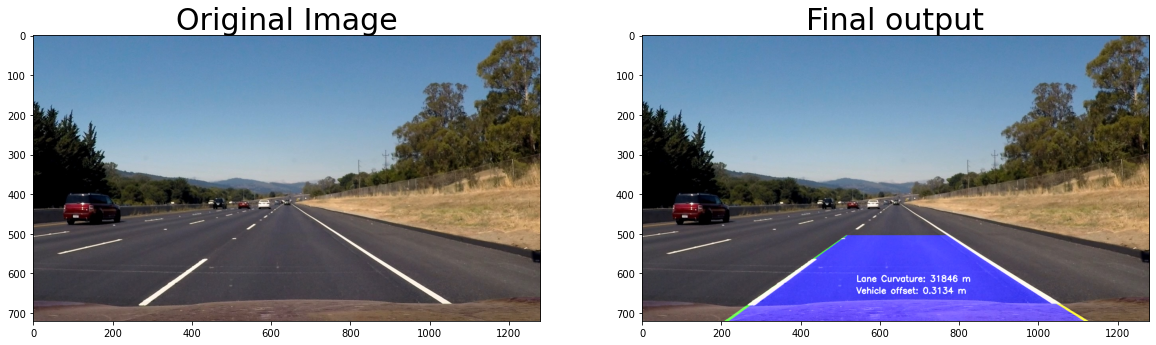

In [51]:
img = cv2.imread('test_images/straight_lines2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = lane.vid_pipeline(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img, cmap="gray")
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst, cmap='gray')
ax2.set_title('Final output', fontsize=30)